<h3>Importing Libraries</h3>
<p>In this cell, the necessary Python libraries such as pandas, yfinance, and datetime are imported for data handling and time series analysis.</p>

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

<h3>Data Collection</h3>
<p>This cell retrieves historical stock market data for Google (GOOG) from Yahoo Finance API. It defines the date range for data collection and selects relevant columns.</p>

In [2]:
today = date.today()
end_date = today.strftime("%Y-%m-%d")

d1 = date.today() - timedelta(days=1460)
start_date = d1.strftime("%Y-%m-%d")

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
df = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.tail())

           Date        Open        High         Low       Close   Adj Close  \
1000 2023-10-11  139.850006  142.220001  139.839996  141.699997  141.699997   
1001 2023-10-12  142.160004  142.380005  139.449997  140.289993  140.289993   
1002 2023-10-13  140.649994  141.339996  137.970001  138.580002  138.580002   
1003 2023-10-16  139.729996  140.904999  139.320007  140.490005  140.490005   
1004 2023-10-17  140.029999  141.250000  138.528702  140.990005  140.990005   

        Volume  
1000  20146300  
1001  18173100  
1002  19438700  
1003  17345600  
1004  17029755  


<h3>Data Preprocessing</h3>
<p>Here, the data is further preprocessed. It narrows down the dataset to include only the 'Date' and 'Close' columns. The code also resets the index for data consistency.</p>

In [3]:
df = df[["Date", "Close"]]
print(df.head())

        Date      Close
0 2019-10-21  62.307499
1 2019-10-22  62.139999
2 2019-10-23  62.956501
3 2019-10-24  63.049500
4 2019-10-25  63.256500


<h3>Data Visualization</h3>
<p>This cell uses the matplotlib library to create a time series plot of the closing prices of Google's stock. The 'fivethirtyeight' style is applied for visualization.</p>

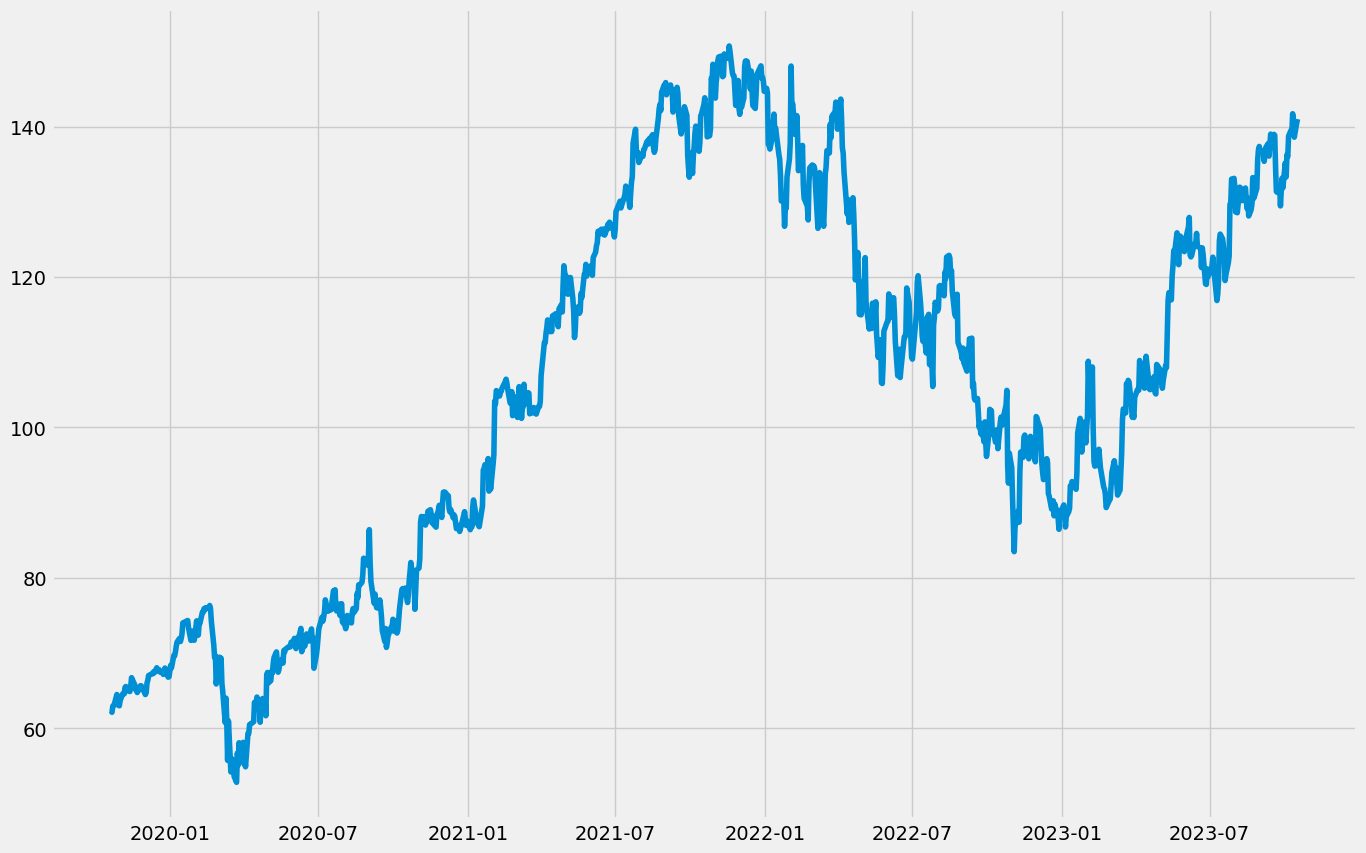

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(df["Date"], df["Close"])

<h3>Time Series Decomposition</h3>
<p>The statsmodels library is utilized for seasonal decomposition. This cell separates the trend, seasonality, and residual components of the stock prices.</p>

<Figure size 640x480 with 0 Axes>

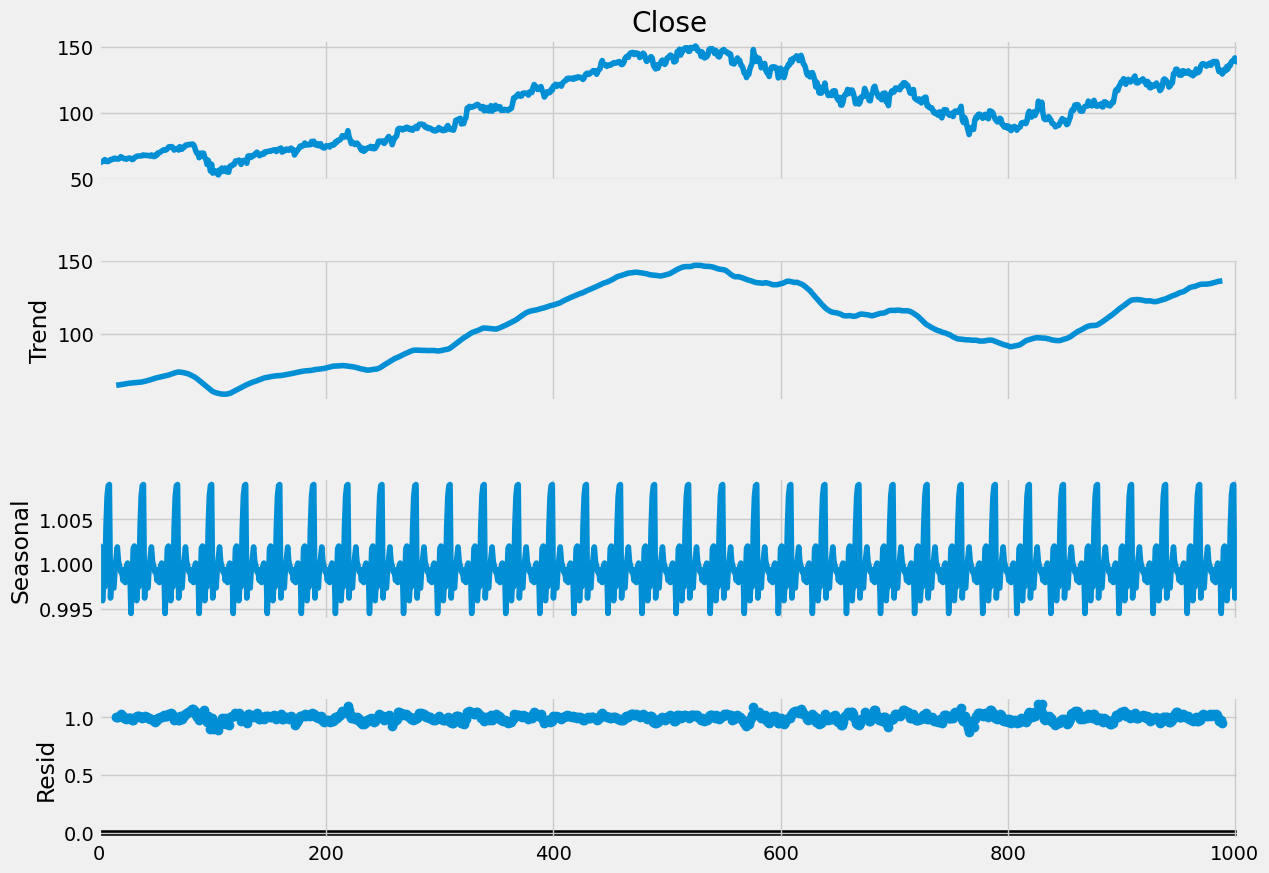

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<h3>AutoCorrelation Plot</h3>
<p>AutoCorrelation is visualized using the pandas library, helping identify potential time series patterns.</p>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

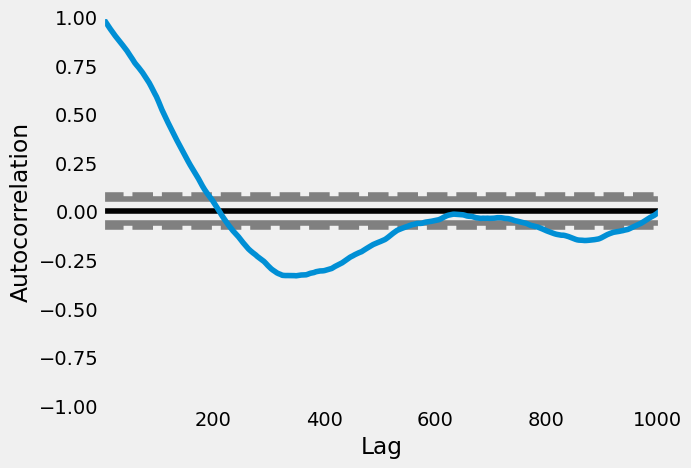

In [6]:
pd.plotting.autocorrelation_plot(df["Close"])

<h3>Partial AutoCorrelation Plot</h3>
<p>This cell generates the Partial AutoCorrelation Function (PACF) plot to aid in parameter selection for the ARIMA model.</p>

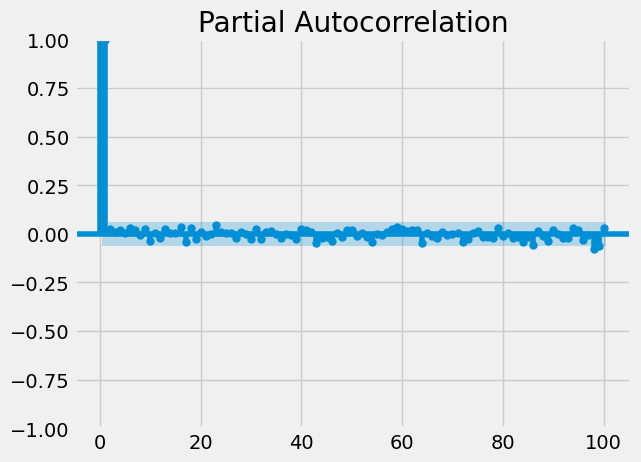

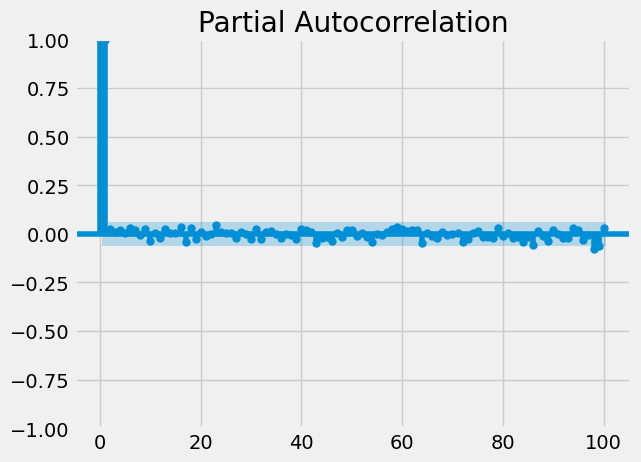

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100)

<h3>ARIMA Modeling</h3>
<p>The ARIMA (AutoRegressive Integrated Moving Average) model is constructed here. It fits the model to the 'Close' prices with specified parameters and prints a summary of the model.</p>

In [8]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1005
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2154.020
Date:                Wed, 18 Oct 2023   AIC                           4324.041
Time:                        01:16:48   BIC                           4363.335
Sample:                             0   HQIC                          4338.972
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3998      0.031     45.399      0.000       1.339       1.460
ar.L2         -0.9042      0.048    -18.689      0.000      -0.999      -0.809
ar.L3         -0.0926      0.054     -1.721      0.0

/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<h3>ARIMA Predictions</h3>
<p>This cell generates predictions using the ARIMA model and prints the results.</p>

In [9]:
predictions = fitted.predict()
print(predictions)

0         0.000000
1        62.307486
2        62.148218
3        62.916441
4        63.050951
           ...    
1000    139.161869
1001    141.258437
1002    139.887602
1003    138.122725
1004    140.265078
Name: predicted_mean, Length: 1005, dtype: float64


<h3>SARIMAX Predictions</h3>
<p>Predictions for future stock prices are generated using the SARIMAX model.</p>

In [10]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27343D+00    |proj g|=  1.43473D-01


 This problem is unconstrained.



At iterate    5    f=  2.18044D+00    |proj g|=  3.74904D-02

At iterate   10    f=  2.14988D+00    |proj g|=  7.61639D-03

At iterate   15    f=  2.14841D+00    |proj g|=  1.66574D-03

At iterate   20    f=  2.14833D+00    |proj g|=  4.77547D-04

At iterate   25    f=  2.14832D+00    |proj g|=  6.53239D-04

At iterate   30    f=  2.14826D+00    |proj g|=  2.43144D-03

At iterate   35    f=  2.14812D+00    |proj g|=  2.45208D-03

At iterate   40    f=  2.14807D+00    |proj g|=  1.39108D-04

At iterate   45    f=  2.14807D+00    |proj g|=  2.10925D-04


/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.14804D+00    |proj g|=  3.24549D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     65      1     0     0   3.245D-03   2.148D+00
  F =   2.1480402609252098     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1005
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -2158.780
Date:                            Wed, 18 Oct 2023   AIC                           4347.5

<h3>Data and Predictions Visualization</h3>
<p>The cell plots the training data and the predictions on a single graph for visual comparison.</p>

In [13]:
# Generate predictions using the SARIMAX model

start_date = (df["Date"].iloc[-1] + pd.Timedelta(days=1)).strftime("%Y-%m-%d")
date_range = pd.date_range(start=start_date, periods=50, freq="D")
predictions = model.predict(len(df), len(df) + 49)
                            
predictions.index = date_range
print(predictions)

2023-10-18    141.135702
2023-10-19    141.048414
2023-10-20    141.207639
2023-10-21    141.696034
2023-10-22    141.615197
2023-10-23    141.541721
2023-10-24    141.642534
2023-10-25    141.337817
2023-10-26    141.227980
2023-10-27    141.084448
2023-10-28    141.681790
2023-10-29    141.791701
2023-10-30    141.860158
2023-10-31    141.842170
2023-11-01    142.233503
2023-11-02    142.602928
2023-11-03    142.358934
2023-11-04    142.332974
2023-11-05    142.287507
2023-11-06    141.927302
2023-11-07    141.819446
2023-11-08    141.860317
2023-11-09    142.343466
2023-11-10    142.298993
2023-11-11    142.379662
2023-11-12    142.310670
2023-11-13    142.661079
2023-11-14    143.030744
2023-11-15    143.166698
2023-11-16    143.337025
2023-11-17    143.320246
2023-11-18    143.072367
2023-11-19    143.095085
2023-11-20    143.026500
2023-11-21    143.438651
2023-11-22    143.602993
2023-11-23    143.568773
2023-11-24    143.850465
2023-11-25    144.172224
2023-11-26    144.583717


/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/subhan/Documents/Project1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


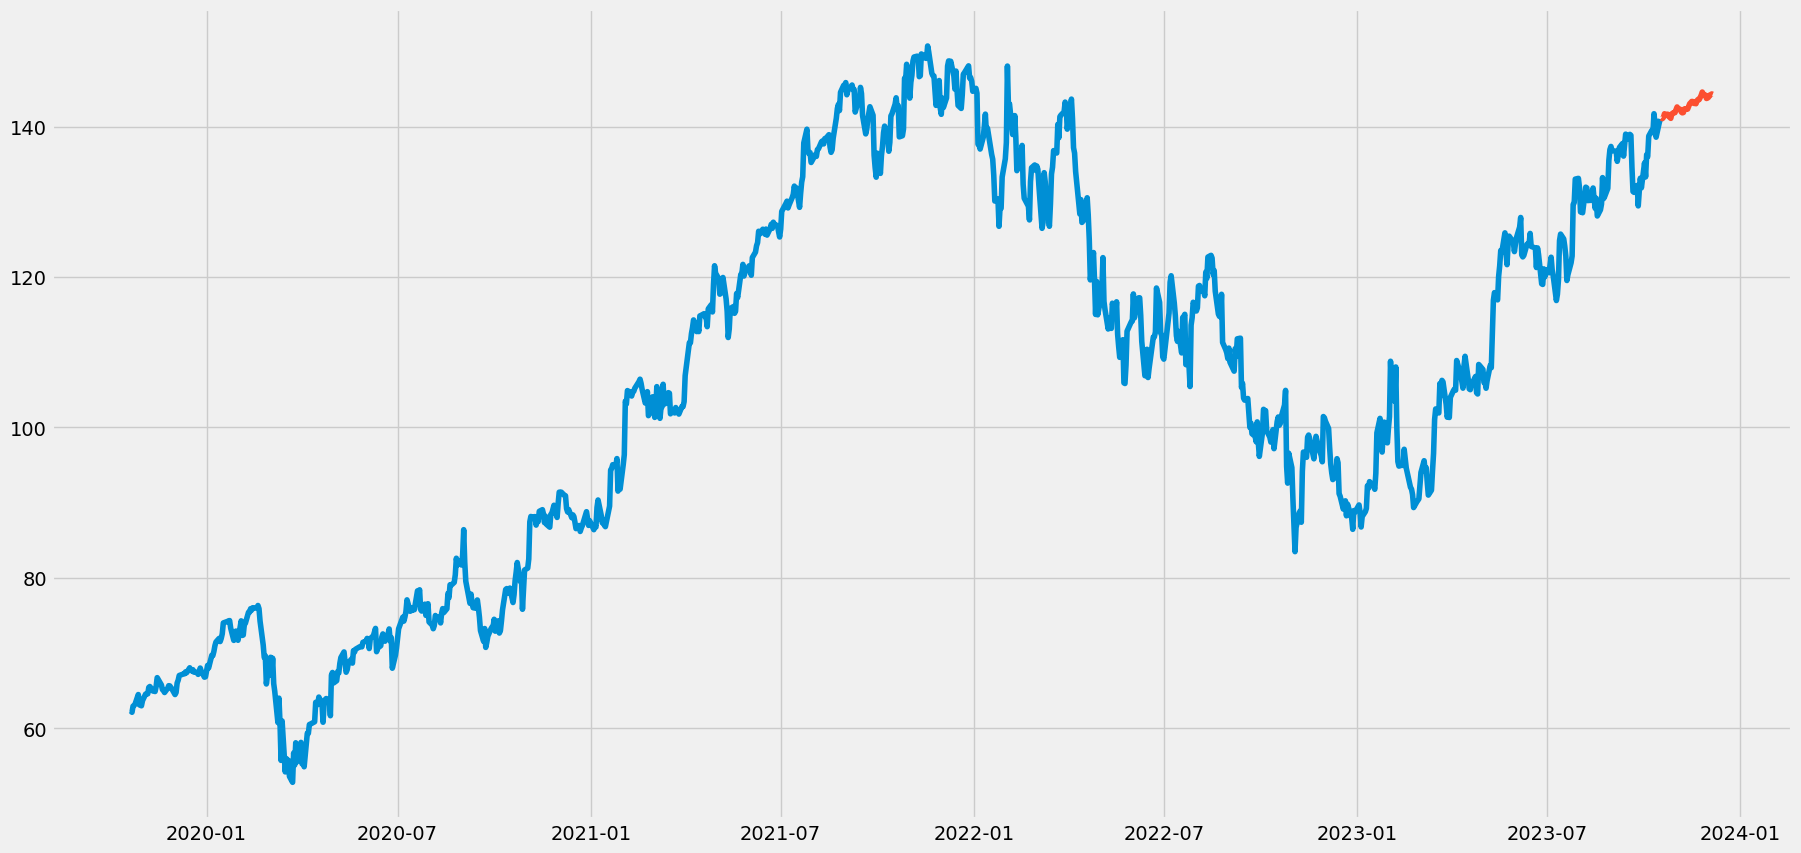

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Close"])
plt.plot(predictions)